### Plotting Different Activation Functions

In [2]:
import matplotlib.pyplot as plt
import numpy as np

##### Sigmoid

Text(0, 0.5, 'Y')

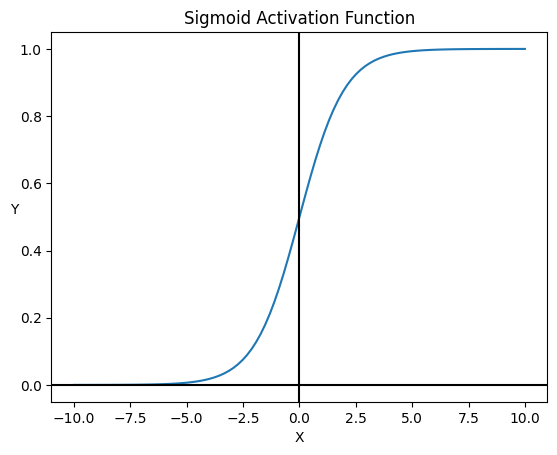

In [14]:
x = np.linspace(-10, 10, 100)
f = lambda x: 1/(1 + np.exp(-x))

plt.plot(x, f(x))
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.title('Sigmoid Activation Function')
plt.xlabel('X')
plt.ylabel('Y', rotation=0)

##### ReLU: Rectified Linear

Text(0, 0.5, 'Y')

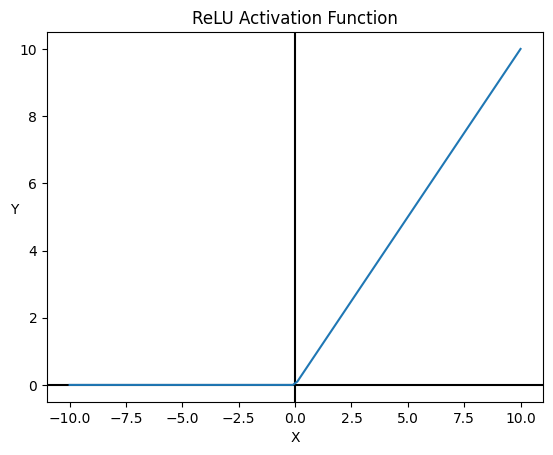

In [28]:
ReLU = lambda x: np.maximum(0, x)

plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.plot(x, ReLU(x))
plt.title('ReLU Activation Function')
plt.xlabel('X')
plt.ylabel('Y', rotation=0)

##### Softmax

In [26]:
# Idea: Want to keep meaning of negative values
# by exponentiating the values, then normalizing to
# obtain a probability distribution

# the ith column represents the ith neuron and the jth
# row represents the the jth batch of output
# i.e. neuron 1 has outputs [4.8, 8.9, 1.41] for 3 batches
layer_outputs = [[4.8, 1.21, 2.385],
                 [8.9, -1.81, 0.2],
                 [1.41, 1.051, 0.026]]
# Note: Since exponentiating values can explode values very quickly, 
# leading to an overflow. To solve this we subtract 
# the max value from the layer outputs, so 
# the values range from (-inf, 0], and exp_values
# range from (0, 1]. This does not affect the proportions
# that are later calculated
exp_values = np.exp(layer_outputs - np.max(layer_outputs, axis=1, keepdims=True))
norm_values = exp_values / np.sum(exp_values, axis=1,
                                  keepdims=True)

print(norm_values)

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


In [27]:
# sum of each row is 1
print(np.sum(norm_values, axis=1, keepdims=True))

[[1.]
 [1.]
 [1.]]


Loss Function: Categorical Cross-Entropy
L[i] = -log(yHat[i, k])
- L[i] - loss of a batch / sample set
- i - ith batch / sample in the set
- k - target label index, index of correct class probability
- yHat - predicted values